# Week 2

In [4]:
import numpy as np
from math import exp
import pandas as pd
from skimage import io
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

ln = np.log  # assign the numpy log function to a new function called ln

## Default equations

For atmospheric neutral conditions it reads

In [2]:
def windspeed(u_star, k, z, z0):
    # Returns the wind speed (u) at height z. 
    # z0 is roughness length, u_star is frition velocity,
    # and k is the Karman constant
    return (u_star/k)*np.log((z/z0))

k is the on Kármán constant; here taken to be 0.4.

In [3]:
k = 0.4

In [4]:
def windspeed_stability(u_star, k, z, z0, w):
    # Returns the wind speed (u) at height z. 
    # z0 is roughness length, u_star is frition velocity,
    # and k is the Karman constant
    # w is the effect of atmospheric stability
    return (u_star/k)*(np.log((z/z0))-w)

## Week 2 - Section 1 Data

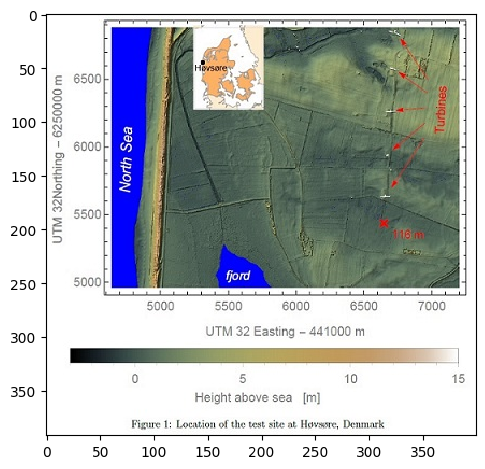

In [5]:
img = io.imread("data/Fig1.jpg")
io.imshow(img)

A data file provides 10-minute averaged wind speeds as a function of height (10, 40, 60, 80, 100, 116, 160m) as well as instantaneous wind directions measured at three heights (10,60 and 100m). The data series covers 18 hours starting from 00:00 at night.

In [6]:
data = pd.read_csv('data/Week2.csv')
data.head()

,time (hour),u10 (m/s),u40 (m/s),u60 (m/s),u80 (m/s),u100 (m/s),u116 (m/s),u160 (m/s),dir10,dir60,dir100,Unnamed: 11,Unnamed: 12,time decimal hours,Unnamed: 14,Unnamed: 15
0,0:00,4.25636,7.18414,8.56345,9.75567,10.9667,12.1298,13.8083,110.616,131.652,141.809,NaN,NaN,0.000000,NaN,midnight
1,0:10,4.54607,7.40763,8.62832,9.91782,11.2024,12.2694,14.1229,114.551,133.624,142.565,NaN,NaN,0.166667,NaN,NaN
2,0:20,4.48597,6.90398,8.06806,9.54922,10.9354,12.0622,14.1083,114.343,135.404,142.934,NaN,NaN,0.333333,NaN,NaN
3,0:30,4.29970,6.78310,8.18141,9.64565,10.9862,12.0684,13.8210,114.325,135.272,143.951,NaN,NaN,0.500000,NaN,NaN
4,0:40,4.32460,6.78405,8.07585,9.48084,10.7186,11.7632,13.6223,112.893,133.654,141.589,NaN,NaN,0.666667,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time (hour)         109 non-null    object 
 1   u10 (m/s)           109 non-null    float64
 2   u40 (m/s)           109 non-null    float64
 3   u60 (m/s)           109 non-null    float64
 4   u80 (m/s)           109 non-null    float64
 5   u100 (m/s)          109 non-null    float64
 6   u116 (m/s)          109 non-null    float64
 7   u160 (m/s)          109 non-null    float64
 8   dir10               109 non-null    float64
 9   dir60               109 non-null    float64
 10  dir100              109 non-null    float64
 11  Unnamed: 11         0 non-null      float64
 12  Unnamed: 12         0 non-null      float64
 13  time decimal hours  109 non-null    float64
 14  Unnamed: 14         0 non-null      float64
 15  Unnamed: 15         3 non-null      object 
dtypes: float

In [8]:
data.drop(columns=['Unnamed: 11','Unnamed: 12','Unnamed: 14'], inplace=True)

From the table look up, estimate the roughness length that is relevant for the wind profile at the mast location. Hint: Use Fig. 1 to guide you.

In [9]:
z0 = 0.03

The friction velocity is a measure of the momentum transport from the free atmosphere to the boundary layer.  Assuming that the stability effect is small at 10m, use the table value of z0 to derive the variation of the friction velocity u∗ over the 18 hours in the data file by means of Eq.(1). Make a plot of u∗ as a function of time (use Excel, Matlab, or another computer program).

In [10]:
# Stability effect is small at 10m
w = 10

In [11]:
def friction_velocity(u, k, z, z0):
    # Assume q is small at 10 m so use eq 1
    return (u/np.log(z/z0))*k

In [12]:
z_range = [10, 40, 60, 80, 100, 116, 160]
for z in z_range:
    new_col = f'u_star_{z}m'
    col = f'u{z} (m/s)'
    data[new_col] = data[col].apply(lambda u: friction_velocity(u, k, z, z0))

In [13]:
data

,time (hour),u10 (m/s),u40 (m/s),u60 (m/s),u80 (m/s),u100 (m/s),u116 (m/s),u160 (m/s),dir10,dir60,dir100,time decimal hours,Unnamed: 15,u_star_10m,u_star_40m,u_star_60m,u_star_80m,u_star_100m,u_star_116m,u_star_160m
0,0:00,4.25636,7.18414,8.56345,9.75567,10.9667,12.1298,13.8083,110.616,131.652,141.809,0.000000,midnight,0.293080,0.399372,0.450654,0.494673,0.540782,0.587389,0.643614
1,0:10,4.54607,7.40763,8.62832,9.91782,11.2024,12.2694,14.1229,114.551,133.624,142.565,0.166667,NaN,0.313029,0.411796,0.454068,0.502895,0.552405,0.594149,0.658277
2,0:20,4.48597,6.90398,8.06806,9.54922,10.9354,12.0622,14.1083,114.343,135.404,142.934,0.333333,NaN,0.308890,0.383798,0.424584,0.484204,0.539239,0.584115,0.657597
3,0:30,4.29970,6.78310,8.18141,9.64565,10.9862,12.0684,13.8210,114.325,135.272,143.951,0.500000,NaN,0.296064,0.377078,0.430549,0.489094,0.541744,0.584416,0.644206
4,0:40,4.32460,6.78405,8.07585,9.48084,10.7186,11.7632,13.6223,112.893,133.654,141.589,0.666667,NaN,0.297779,0.377131,0.424994,0.480737,0.528548,0.569636,0.634944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,17:20,8.28413,10.73260,11.37630,11.98980,12.4309,12.7823,13.5907,130.701,132.892,132.903,17.333333,NaN,0.570420,0.596634,0.598682,0.607957,0.612984,0.618986,0.633471
105,17:30,8.27206,10.37020,11.26700,12.14490,12.7604,13.2135,13.7607,128.364,130.860,130.861,17.500000,NaN,0.569589,0.576488,0.592930,0.615822,0.629232,0.639867,0.641395
106,17:40,8.52854,10.29890,11.07740,11.88470,12.5598,13.0926,13.6678,126.976,127.568,128.645,17.666667,NaN,0.587249,0.572524,0.582952,0.602628,0.619340,0.634013,0.637065
107,17:50,7.73636,9.51184,10.26600,10.91810,11.5416,12.0016,13.5611,124.838,125.822,126.965,17.833333,NaN,0.532702,0.528771,0.540252,0.553615,0.569132,0.581181,0.632092


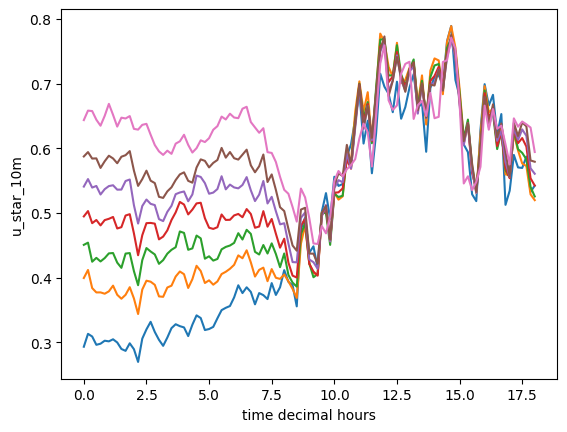

In [14]:
for z in z_range:
    new_col = f'u_star_{z}m'
    sns.lineplot(x=data['time decimal hours'], y = data[new_col])


<AxesSubplot:xlabel='time decimal hours', ylabel='u_star_10m'>

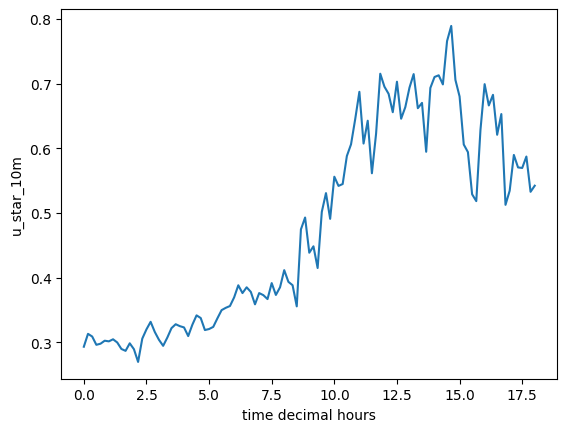

In [15]:
new_col = f'u_star_{z}m'
sns.lineplot(x=data['time decimal hours'], y = data['u_star_10m'])

**Only supposed to be looking at 10m**

The logarithmic wind profile with the stability correction is given in 
Eq.(2). Use the time varying u* that you just derived and a constant value of z0 to derive the diurnal variation of the stability correction parameter ψ. Use the wind speed measurements at 60m and make a plot of ψ as a function of time.

In [16]:
def stability_correction(u_star, k, z, z0, u):
    zzz = z/z0
    return np.log(zzz)-((u*k)/u_star)

In [17]:
z0

0.03

In [18]:
z = 60
z0
k

0.4

In [19]:
u =8.56345
u_star = 0.450654
stability_correction(u_star, k, z, z0, u)

-6.441743605201111e-06

In [20]:
u =8.07585
u_star = 0.424994
stability_correction(u_star, k, z, z0, u)

-4.84738460482248e-06

In [21]:
u =9.98710
u_star = 0.525574
stability_correction(u_star, k, z, z0, u)

-6.261208944202679e-06

In [22]:
data['w_60m'] = data.apply(lambda x: stability_correction(x['u_star_10m'], k, z, z0, x['u60 (m/s)']), axis=1)

In [23]:
data[['u60 (m/s)','u_star_10m', 'u_star_60m','w_60m']]

,u60 (m/s),u_star_10m,u_star_60m,w_60m
0,8.56345,0.293080,0.450654,-4.086621
1,8.62832,0.313029,0.454068,-3.424696
2,8.06806,0.308890,0.424584,-2.846897
3,8.18141,0.296064,0.430549,-3.452655
4,8.07585,0.297779,0.424994,-3.247215
...,...,...,...,...
104,11.37630,0.570420,0.598682,-0.376586
105,11.26700,0.569589,0.592930,-0.311469
106,11.07740,0.587249,0.582952,0.055625
107,10.26600,0.532702,0.540252,-0.107718


<AxesSubplot:xlabel='time decimal hours', ylabel='w_60m'>

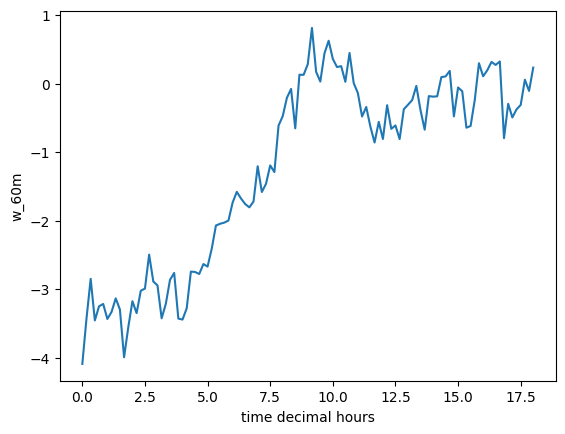

In [24]:
sns.lineplot(x=data['time decimal hours'], y = data['w_60m'])

Use the measured wind speed at 10 and 40m to derive the roughness length z0 from the logarithmic wind profile without accounting for the stability correction, Eq.(1). The roughness length characterizes the upwind landscape and is thus constant. Hint: Write the logarithmic wind profile expression for the wind speed at both 10 and 40m and express ln(z/z0) as ln(z)-ln(z0); then eliminate (u*/k), and solve for the roughness length. Calculate it for every instance in the time series and plot z0 as a function of time.

In [25]:
def roughness_length(u_10, u_40):
    u_k = np.log(4)/(-u_10+u_40)
    return np.exp(np.log(10)-u_10*u_k)

In [26]:
data['z0'] = data.apply(lambda x: roughness_length(x['u10 (m/s)'], x['u40 (m/s)']),axis=1)

In [27]:
data

,time (hour),u10 (m/s),u40 (m/s),u60 (m/s),u80 (m/s),u100 (m/s),u116 (m/s),u160 (m/s),dir10,dir60,...,Unnamed: 15,u_star_10m,u_star_40m,u_star_60m,u_star_80m,u_star_100m,u_star_116m,u_star_160m,w_60m,z0
0,0:00,4.25636,7.18414,8.56345,9.75567,10.9667,12.1298,13.8083,110.616,131.652,...,midnight,0.293080,0.399372,0.450654,0.494673,0.540782,0.587389,0.643614,-4.086621,1.332707
1,0:10,4.54607,7.40763,8.62832,9.91782,11.2024,12.2694,14.1229,114.551,133.624,...,NaN,0.313029,0.411796,0.454068,0.502895,0.552405,0.594149,0.658277,-3.424696,1.105417
2,0:20,4.48597,6.90398,8.06806,9.54922,10.9354,12.0622,14.1083,114.343,135.404,...,NaN,0.308890,0.383798,0.424584,0.484204,0.539239,0.584115,0.657597,-2.846897,0.763904
3,0:30,4.29970,6.78310,8.18141,9.64565,10.9862,12.0684,13.8210,114.325,135.272,...,NaN,0.296064,0.377078,0.430549,0.489094,0.541744,0.584416,0.644206,-3.452655,0.907001
4,0:40,4.32460,6.78405,8.07585,9.48084,10.7186,11.7632,13.6223,112.893,133.654,...,NaN,0.297779,0.377131,0.424994,0.480737,0.528548,0.569636,0.634944,-3.247215,0.873698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,17:20,8.28413,10.73260,11.37630,11.98980,12.4309,12.7823,13.5907,130.701,132.892,...,NaN,0.570420,0.596634,0.598682,0.607957,0.612984,0.618986,0.633471,-0.376586,0.091832
105,17:30,8.27206,10.37020,11.26700,12.14490,12.7604,13.2135,13.7607,128.364,130.860,...,NaN,0.569589,0.576488,0.592930,0.615822,0.629232,0.639867,0.641395,-0.311469,0.042300
106,17:40,8.52854,10.29890,11.07740,11.88470,12.5598,13.0926,13.6678,126.976,127.568,...,NaN,0.587249,0.572524,0.582952,0.602628,0.619340,0.634013,0.637065,0.055625,0.012579
107,17:50,7.73636,9.51184,10.26600,10.91810,11.5416,12.0016,13.5611,124.838,125.822,...,NaN,0.532702,0.528771,0.540252,0.553615,0.569132,0.581181,0.632092,-0.107718,0.023803


<AxesSubplot:xlabel='time decimal hours', ylabel='z0'>

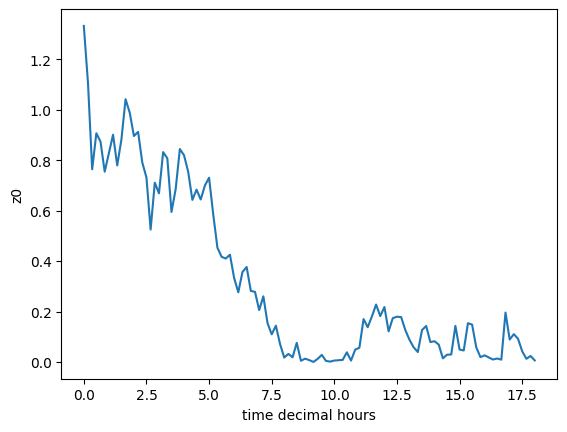

In [28]:
sns.lineplot(x=data['time decimal hours'], y = data['z0'])

Make plots of the wind direction at 
10
�
10m and 
100
�
100m as a function of time and find the difference.

<AxesSubplot:xlabel='time decimal hours', ylabel='dir10'>

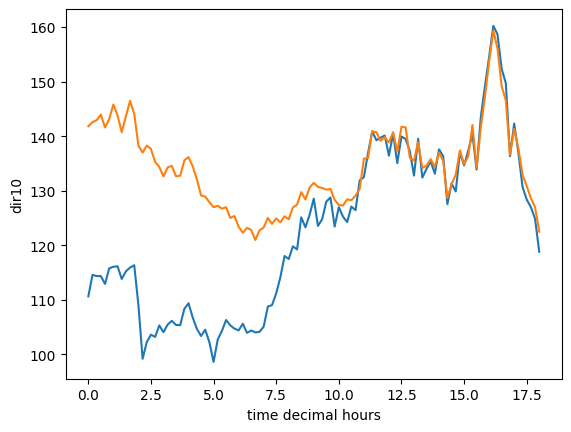

In [29]:
sns.lineplot(x=data['time decimal hours'], y = data['dir10'])
sns.lineplot(x=data['time decimal hours'], y = data['dir100'])

In [30]:
data['dir_diff_10_100'] = data['dir100'] - data['dir10']
data.head()

,time (hour),u10 (m/s),u40 (m/s),u60 (m/s),u80 (m/s),u100 (m/s),u116 (m/s),u160 (m/s),dir10,dir60,...,u_star_10m,u_star_40m,u_star_60m,u_star_80m,u_star_100m,u_star_116m,u_star_160m,w_60m,z0,dir_diff_10_100
0,0:00,4.25636,7.18414,8.56345,9.75567,10.9667,12.1298,13.8083,110.616,131.652,...,0.293080,0.399372,0.450654,0.494673,0.540782,0.587389,0.643614,-4.086621,1.332707,31.193
1,0:10,4.54607,7.40763,8.62832,9.91782,11.2024,12.2694,14.1229,114.551,133.624,...,0.313029,0.411796,0.454068,0.502895,0.552405,0.594149,0.658277,-3.424696,1.105417,28.014
2,0:20,4.48597,6.90398,8.06806,9.54922,10.9354,12.0622,14.1083,114.343,135.404,...,0.308890,0.383798,0.424584,0.484204,0.539239,0.584115,0.657597,-2.846897,0.763904,28.591
3,0:30,4.29970,6.78310,8.18141,9.64565,10.9862,12.0684,13.8210,114.325,135.272,...,0.296064,0.377078,0.430549,0.489094,0.541744,0.584416,0.644206,-3.452655,0.907001,29.626
4,0:40,4.32460,6.78405,8.07585,9.48084,10.7186,11.7632,13.6223,112.893,133.654,...,0.297779,0.377131,0.424994,0.480737,0.528548,0.569636,0.634944,-3.247215,0.873698,28.696


<AxesSubplot:xlabel='time decimal hours', ylabel='dir_diff_10_100'>

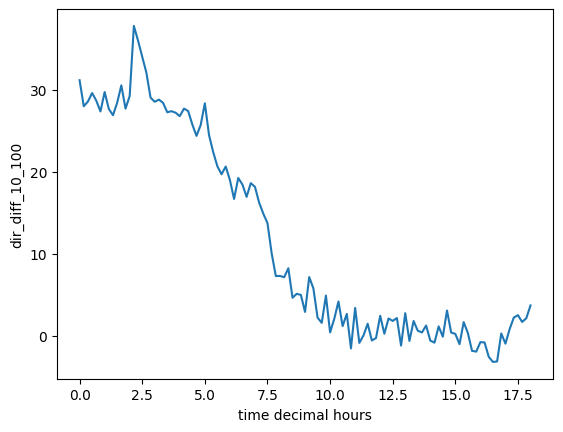

In [31]:
sns.lineplot(x=data['time decimal hours'], y = data['dir_diff_10_100'])

Assume that the energy production of a wind turbine is proportional to the cube of the wind speed. Consider you have a 10m tall wind turbine and calculate the wind speed cubed for that height. Plot the values as a function of time.

In [32]:
z = 10

In [33]:
def energy_production(u):
    return u**3

In [34]:
data['E_production_10m'] = data['u10 (m/s)'].apply(lambda u: energy_production(u))

<AxesSubplot:xlabel='time decimal hours', ylabel='E_production_10m'>

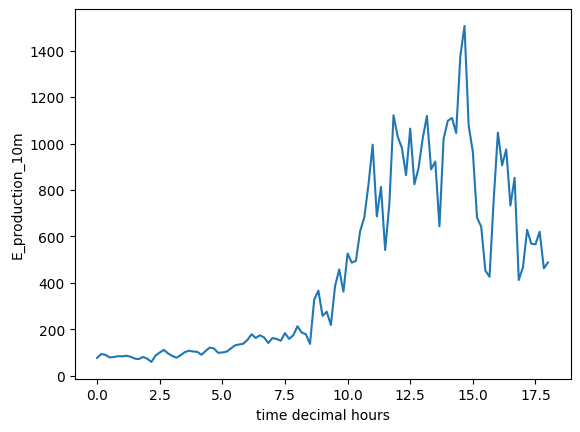

In [35]:
sns.lineplot(x=data['time decimal hours'], y = data['E_production_10m'])

Now consider you have a 160m tall wind turbine and repeat the tasks given in question number 6.

<AxesSubplot:xlabel='time decimal hours', ylabel='E_production_160m'>

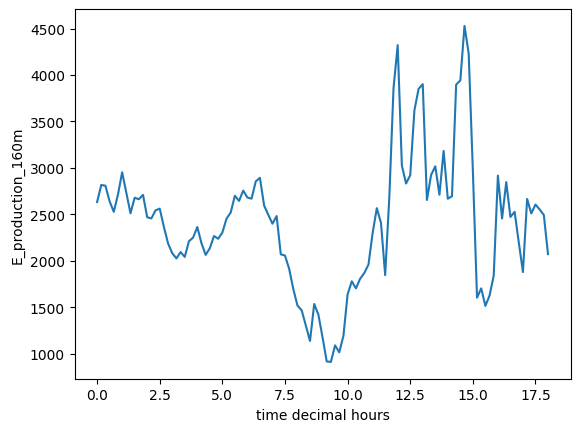

In [36]:
z = 160
data['E_production_160m'] = data['u160 (m/s)'].apply(lambda u: energy_production(u))
sns.lineplot(x=data['time decimal hours'], y = data['E_production_160m'])

<AxesSubplot:xlabel='time decimal hours', ylabel='E_production_10m'>

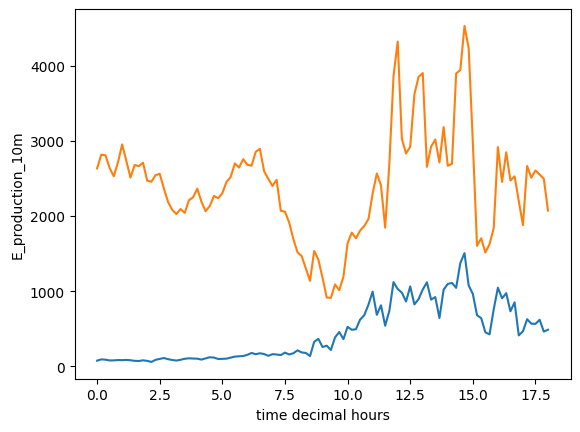

In [37]:
sns.lineplot(x=data['time decimal hours'], y = data['E_production_10m'])
sns.lineplot(x=data['time decimal hours'], y = data['E_production_160m'])

When do you find the largest relative difference in production between a 
10m and a 160m wind turbine?

In [38]:
data['prod_diff_10_160'] = (data['E_production_160m']/ data['E_production_10m'])
data.head()

,time (hour),u10 (m/s),u40 (m/s),u60 (m/s),u80 (m/s),u100 (m/s),u116 (m/s),u160 (m/s),dir10,dir60,...,u_star_80m,u_star_100m,u_star_116m,u_star_160m,w_60m,z0,dir_diff_10_100,E_production_10m,E_production_160m,prod_diff_10_160
0,0:00,4.25636,7.18414,8.56345,9.75567,10.9667,12.1298,13.8083,110.616,131.652,...,0.494673,0.540782,0.587389,0.643614,-4.086621,1.332707,31.193,77.110773,2632.816809,34.143307
1,0:10,4.54607,7.40763,8.62832,9.91782,11.2024,12.2694,14.1229,114.551,133.624,...,0.502895,0.552405,0.594149,0.658277,-3.424696,1.105417,28.014,93.952503,2816.901442,29.982186
2,0:20,4.48597,6.90398,8.06806,9.54922,10.9354,12.0622,14.1083,114.343,135.404,...,0.484204,0.539239,0.584115,0.657597,-2.846897,0.763904,28.591,90.275332,2808.174284,31.106773
3,0:30,4.29970,6.78310,8.18141,9.64565,10.9862,12.0684,13.8210,114.325,135.272,...,0.489094,0.541744,0.584416,0.644206,-3.452655,0.907001,29.626,79.490360,2640.087987,33.212681
4,0:40,4.32460,6.78405,8.07585,9.48084,10.7186,11.7632,13.6223,112.893,133.654,...,0.480737,0.528548,0.569636,0.634944,-3.247215,0.873698,28.696,80.879383,2527.850125,31.254567


<AxesSubplot:xlabel='time decimal hours', ylabel='E_production_10m'>

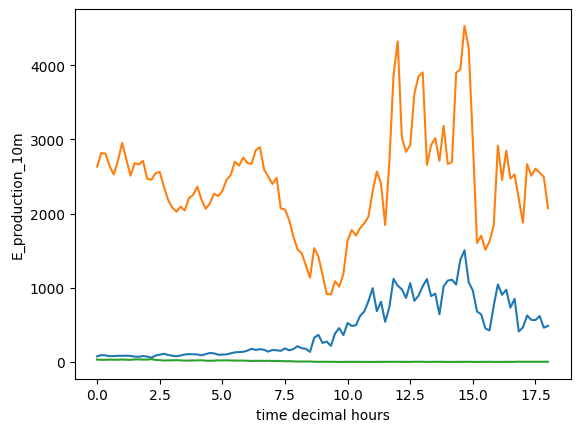

In [39]:
sns.lineplot(x=data['time decimal hours'], y = data['E_production_10m'])
sns.lineplot(x=data['time decimal hours'], y = data['E_production_160m'])
sns.lineplot(x=data['time decimal hours'], y = data['prod_diff_10_160'])


<AxesSubplot:xlabel='time decimal hours', ylabel='prod_diff_10_160'>

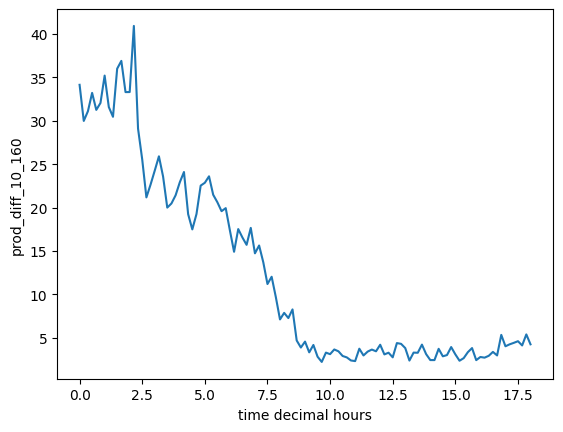

In [40]:
sns.lineplot(x=data['time decimal hours'], y = data['prod_diff_10_160'])


# Week 2 - Section 2: Test and Measurements

Wind data is obtained from the measurements of a sonic anemometer mounted on a 116.5m tall meteorological mast, located at Danish National Test Center for Large Wind Turbines at Høvsøre, Denmark. 

 
1.
Figure 1. shows the location of the test center (see inset). The site is about 1.7km from the North Sea with a mean height of 2m above mean sea level and flat homogeneous terrain. The site also comprises five turbine stands, five power curve masts, two lighting towers and a central service building.

### Data
A PDF data file contains 20Hz measurements of the 
�
u, 
�
v and 
�
w components using a sonic anemometer over a 30-min period.

In [44]:
sonic_df = pd.read_csv("data/week2_2.csv")
sonic_df

,u,v,w
0,8.149239,-1.004577,-0.386437
1,8.179172,-1.038056,-0.366863
2,8.124179,-0.961820,-0.326073
3,8.294137,-0.965844,-0.388507
4,8.291696,-1.051260,-0.418475
...,...,...,...
35995,9.564305,0.446871,0.463438
35996,9.496966,0.409857,0.564410
35997,9.445132,0.495371,0.565150
35998,9.505051,0.536116,0.594298


1. Separate the time series into mean and fluctuating parts. Plot the time series of the fluctuating parts of each component. For which component does the variations in wind speed look larger?

<AxesSubplot:ylabel='u'>

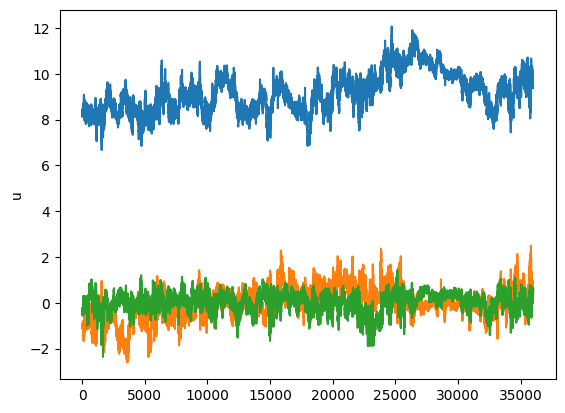

In [50]:
sns.lineplot(x=sonic_df.index, y = sonic_df['u'])
sns.lineplot(x=sonic_df.index, y = sonic_df['v'])
sns.lineplot(x=sonic_df.index, y = sonic_df['w'])


2. Compute the mean of each component. Is the mean of 
�
v and 
�
w approximately zero? If yes, why?

In [52]:
u_mean = np.mean(sonic_df['u'])
u_mean

9.151454691846666

In [53]:
v_mean = np.mean(sonic_df['v'])
v_mean

3.500038777322819e-13

In [54]:
w_mean = np.mean(sonic_df['w'])
w_mean

-1.0111078394301228e-12

3. Compute the standard deviation of each component. Which of the components 
(u,v,w) has the largest standard deviation?

In [55]:
variables = ['u','v','w']
for var in variables:
    name = f'{var}_std'
    name = np.std(sonic_df[f'{var}'])
    print(f'For {var}, the std is {name}')

For u, the std is 0.854783256330241
For v, the std is 0.6687174467216035
For w, the std is 0.41418375679417313


4. The figure below shows turbulence spectra of the 
�
u, 
�
v, and 
�
w components. Which turbulence scales are larger and why? Hint: Refer to the video lecture for the definition of turbulence scales based on the spectra.

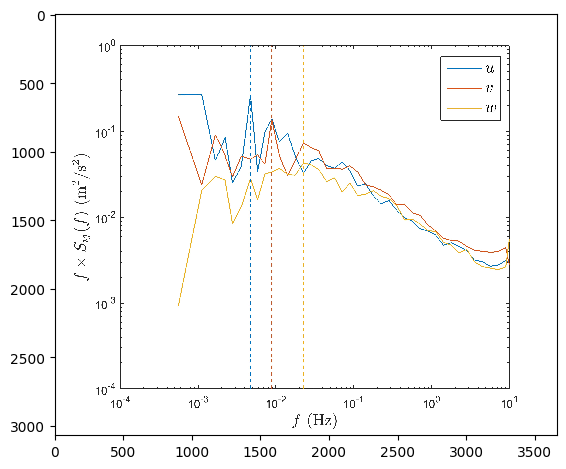

In [57]:
img = io.imread("data/Fig_week2_2.jpg")
io.imshow(img)

*Turbulence spectra is also a very important keyword that is frequently used. As mentioned before, it gives us the distribution of the kinetic energy and the wind with respect to the frequency. So on the x axis, you normally have the frequency or the wave number, which is the inverse of the wavelength. On the y axis, we normally have the pre-multiply spectrum, multiplied by the wave number, or the frequency. The pre-multiplication is done in order to get the peak in the spectre very clearly, otherwise it's very difficult to see where the peak energy lies on the spectrum. The red line show the spectrum of the u component, the blue line is for the v, and the green is for the w. As we can clearly see, these scales which is the turbulence land scale, which is given by the wave length or the wave number corresponding to the maximum energy in the spectra, is very different for different components.*

5. The figure below shows the auto-correlation function of the u component. The integral time scale is computed from the definition (see video lecture), where the integration is performed up to the time lag where the auto-correlation function crosses zero the first time. Its value turns out to be approximately 116 seconds. What does the integral time scale mean physically?

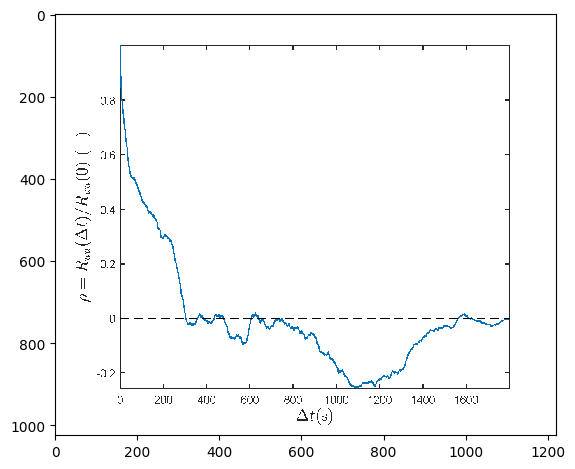

In [58]:
img = io.imread("data/IntegralTimeScale.png")
io.imshow(img)

*Another important keyword is integral scale.
Play video starting at :4:49 and follow transcript4:49
Physically, what integral scale means, is that if we take a look at this time series, and if we simply take a look at the wind speed at 200 seconds,
Play video starting at :5:1 and follow transcript5:01
what can we say about the wind speed at 250 or 300 seconds and 100 seconds?
Play video starting at :5:9 and follow transcript5:09
Just by looking at the time series, so it's important to understand that there is something that is called the memory that the time series has, which is nothing but stored or quantified as integrals scale.
Play video starting at :5:25 and follow transcript5:25
So from the time series, we compute the auto-correlation function as a function of the time difference between the two observations, and then we get a certain curve. And the area inside this curve gives us the integral scale, which is given by this mathematical expression.*

# Week 3 - pt 2: Technology Concepts

In [57]:
def power(air_density,A,V,Cp):
    return 0.5*air_density*A*V**3*Cp

In [58]:
def area(P,air_density,V,Cp):
    return (P*2)/(air_density*(V**3)*Cp)

In [59]:
def blade_length(A):
    return math.sqrt(A/math.pi)

### Horizontal axis wind turbine

What is the required rotor radius (blade length) of a fast-running horizontal-axis wind turbine (
�
m)?

In [60]:
P = 5*(10**6)
V = 10
air_density = 1.225
Cp_fastH = 0.45

A = area(P,air_density,V,Cp_fastH)
blade_length(A)

75.98900579074909

What is the required rotor radius (blade length) of a slow-running horizontal-axis wind turbine with a rotor of multiple blades (
�
m)?

In [61]:
Cp_slowH = 0.3
A = area(P,air_density,V,Cp_slowH)
blade_length(A)

93.06714512436571

### Vertical axis wind turbine

What is the required swept area of a Darrieus wind turbine (
�
2
m 
2
 )?

In [62]:
Cp_Darrieus = 0.38
A = area(P,air_density,V,Cp_Darrieus)
A

21482.277121374867

What is the length of a blade of this Darrieus wind turbine assuming that the blades are shaped as circular arcs such that the swept area forms a circle (
�
m)?

In [64]:
R = blade_length(A)
R

82.69232845599092

In [65]:
L = R*math.pi
L

259.7856115855753

### Kite-based turbine 

In [67]:
def kite_area(P,air_density,V,Cl,G):
    return 2*(27/4)*P/(air_density*(V**3)*Cl*(G**2))

What is the required area of the kite 
�
�
�
�
�
A 
kite
​
  if the lift coefficient is 
�
�
=
1
C 
L
​
 =1 and the glide ratio is 
5
5 ( in 
�
2
m 
2
 )?

In [68]:
Cl = 1
G = 5

In [69]:
kite_area(P,air_density,V,Cl,G)

2204.081632653061

 What is the required area of the kite 
�
�
�
�
�
A 
kite
​
  if the lift coefficient is 
�
�
=
1
C 
L
​
 =1 and the glide ratio is 
10
10 ( in 
�
2
m 
2
 )?

In [70]:
Cl = 1
G = 10
kite_area(P,air_density,V,Cl,G)

551.0204081632653

### Machine based on flow induced vibrations 

7. What is the required length of a straight and rigid beam that vibrates with an amplitude of 
10
�
10m in a plane perpendicular to the mean wind speed of 
10
�
/
�
10m/s if you assume that the power coefficient is 
�
�
=
0.1
C 
P
​
 =0.1 and the machine must extract 
5
�
�
5MW ( in 
�
m)?

In [71]:
V = 10
Cp = 0.1
amp = 10

A = area(P,air_density,V,Cp)
l = A/amp
l

8163.26530612245